<a href="https://colab.research.google.com/github/kellykhy/DL2022-1/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## HW 2
Answer following questions 



### Below is one of the example code for binary-class classification problem on IMDB dataset

In [44]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [45]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [46]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [47]:
y_train[:5]

array([1., 0., 0., 1., 0.], dtype=float32)

In [48]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [49]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [50]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [51]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 50ms/step - loss: 0.5090 - accuracy: 0.8010 - val_loss: 0.3968 - val_accuracy: 0.8559
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3058 - accuracy: 0.9004 - val_loss: 0.3053 - val_accuracy: 0.8863
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2205 - accuracy: 0.9285 - val_loss: 0.3098 - val_accuracy: 0.8737
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1750 - accuracy: 0.9431 - val_loss: 0.2728 - val_accuracy: 0.8908
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1405 - accuracy: 0.9543 - val_loss: 0.2802 - val_accuracy: 0.8872
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1182 - accuracy: 0.9627 - val_loss: 0.2943 - val_accuracy: 0.8864
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0959 - accuracy: 0.9714 - val_loss: 0.3129 - val_accuracy: 0.8844
Epoch 8/20
30

### Q1 Binary classification is multi-class classification with two classes so we can modify our model as below:

In [52]:
model2 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(2, activation="softmax")
])

### Complete the codes for compile and model fitting. 

In [53]:
model2.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [54]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [55]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [56]:
history = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 36ms/step - loss: 0.5222 - accuracy: 0.7758 - val_loss: 0.3809 - val_accuracy: 0.8678
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2986 - accuracy: 0.8998 - val_loss: 0.3048 - val_accuracy: 0.8830
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2120 - accuracy: 0.9274 - val_loss: 0.3081 - val_accuracy: 0.8735
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1641 - accuracy: 0.9455 - val_loss: 0.2825 - val_accuracy: 0.8861
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1333 - accuracy: 0.9561 - val_loss: 0.2887 - val_accuracy: 0.8857
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1087 - accuracy: 0.9655 - val_loss: 0.3085 - val_accuracy: 0.8844
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0904 - accuracy: 0.9730 - val_loss: 0.3255 - val_accuracy: 0.8816
Epoch 8/20
30

### Q2 Below is visualization of the validation loss. We can see overfitting after 5 epochs.  

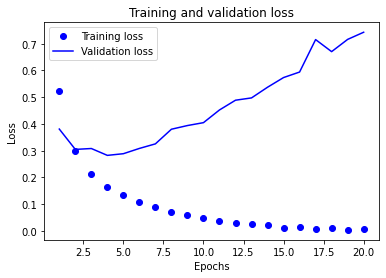

In [57]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Add dropout layers and visualize the validation loss of your new model.

In [58]:
## Add dropout layers 

model2_dr = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(2, activation="softmax")
])

## retrain and visualize the validation loss of new model
model2_dr.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history_dr = model2_dr.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 35ms/step - loss: 0.6448 - accuracy: 0.6260 - val_loss: 0.5513 - val_accuracy: 0.7779
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.5354 - accuracy: 0.7732 - val_loss: 0.4506 - val_accuracy: 0.8547
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4532 - accuracy: 0.8314 - val_loss: 0.3881 - val_accuracy: 0.8805
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3895 - accuracy: 0.8629 - val_loss: 0.3397 - val_accuracy: 0.8862
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3365 - accuracy: 0.8837 - val_loss: 0.3092 - val_accuracy: 0.8812
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2928 - accuracy: 0.8995 - val_loss: 0.3194 - val_accuracy: 0.8853
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2608 - accuracy: 0.9121 - val_loss: 0.3027 - val_accuracy: 0.8879
Epoch 8/20
30

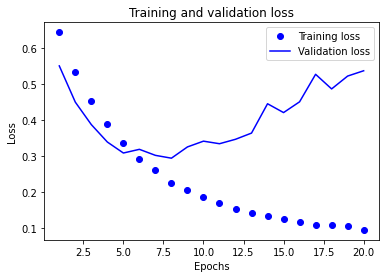

In [59]:
import matplotlib.pyplot as plt
history_dr_dict = history_dr.history
loss_values = history_dr_dict["loss"]
val_loss_values = history_dr_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Q3 Add l1 regularization on the second dense layer from the original model below. 

In [60]:
## Add l1 regularization on the second dense layers 
from tensorflow.keras import regularizers
model2_l1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, kernel_regularizer = regularizers.l1(0.002), activation="relu"),    ### add l1 regularization here
    layers.Dense(2, activation="softmax")
])

### Finish the training and compare the dropout model(model from Q2) and l1 regularization model after visualizing their validation losses.

In [61]:
model2_l1.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
history_l1 = model2_l1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 44ms/step - loss: 0.6047 - accuracy: 0.7827 - val_loss: 0.4673 - val_accuracy: 0.8745
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3917 - accuracy: 0.9017 - val_loss: 0.4105 - val_accuracy: 0.8733
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3091 - accuracy: 0.9285 - val_loss: 0.3648 - val_accuracy: 0.8903
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2550 - accuracy: 0.9459 - val_loss: 0.3589 - val_accuracy: 0.8886
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2200 - accuracy: 0.9554 - val_loss: 0.3612 - val_accuracy: 0.8851
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1902 - accuracy: 0.9648 - val_loss: 0.3700 - val_accuracy: 0.8861
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1666 - accuracy: 0.9723 - val_loss: 0.3830 - val_accuracy: 0.8845
Epoch 8/20
30